# Data Understanding

## Step 1: Load the necessary Libraries

In [18]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Warnings
import warnings
warnings.filterwarnings('ignore') # to ignore the warnings

## Step 2: Read Dataset

In [22]:
# Load the data
# The dataset contains loan information, including applicant details and loan status
df = pd.read_csv("loan.csv",low_memory=False)
data_dictionary = pd.read_excel("Data_Dictionary.xlsx")

## Step 3: Initial Data Inspection

In [25]:
#Finding the Shape/Size of the Dataset
df.shape

(39717, 111)

In [29]:
# Inspecting the structure of the data to understand its content and format
print(df.info())
print(data_dictionary.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
            LoanStatNew                                        Description
0        acc_now_delinq  The number of accounts on which the borrower i...
1  acc_open_past_24mths         Number of trades opened in past 24 months.
2            addr_state  The state provided by the borrower in the loan...
3              all_util              Balance to credit limit on all trades
4            annual_inc  The self-reported annual income provided by th...


In [31]:
#Finding the details of each column and its data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [33]:
#Reveiwing the dataset to understand whats inside the csv
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [35]:
#To check if there is unnessasry rows or not.
df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [39]:
#Find the number of rows
total_rows=len(df)
total_rows

39717

In [41]:
# Check if there is any duplicate rows.
duplicate_rows = len(df[df.duplicated()])
print("Count of duplicate rows:",round(duplicate_rows,2))

Count of duplicate rows: 0


# Missing Values

## Step 4: Dropping the rows 

In [45]:
#Dropping the rows for loan_status=='Current' as the loan currently in progress and cannot contribute to conclusive evidence if the customer will default of pay in future.
df1= df[df['loan_status']!='Current']
print("Total number of rows now:",len(df1)) ## Total no of rows now.

Total number of rows now: 38577


In [47]:
#Identify the % of rows deleted
rows_deleted=((total_rows- len(df1))*100)/total_rows
print("% of rows deleted:",round(rows_deleted,2))

% of rows deleted: 2.87


## Step 5: Deleting Columns having high % (> 40%) of missing values

In [50]:
# Identification of Missing values
100*df1.isnull().mean()

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [52]:
# Taking care of missing values
# Any column having high % (generally >40%) of missing values ideally should not be considered the part of analysis
# Even if it is very relevant column for usecase vcoz the insights comiong out from that column might not be reliable

In [54]:
# Set the threshold for the minimum number of non-missing values required to retain a column
threshold = 0.4 * len(df1)

In [56]:
# Drop columns with 40% or more missing values using axis=1
df_cleaned = df1.dropna(axis=1, thresh=threshold)

In [58]:
# Display the first few rows of the cleaned DataFrame to ensure the columns have been removed
df_cleaned.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [60]:
#Finding the details of each column and its data types in the cleaned dataset
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  38577 no

In [64]:
#Percentage of missing values
# Identification of Missing values in the cleaned dataset
100*df_cleaned.isnull().mean()

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.185033
emp_length                     2.677761
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.477901
purpose                        0.000000
title                          0.028514
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


# Data Transformation

## Step 6: Fiding the Data Types of the reminaing columns

In [68]:
#Understanding the Data TYpes of all the columns
df_cleaned.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

## Step 7: Converting percentage strings to Numerical Value (Float)

In [124]:
# Step 5: Converting percentage strings to Numerical Value (Float)
df_cleaned['int_rate'] = df_cleaned['int_rate'].apply(lambda x: float(x.strip('%')) / 100 if isinstance(x, str) else x)
df_cleaned['revol_util'] = df_cleaned['revol_util'].apply(lambda x: float(x.strip('%')) / 100 if isinstance(x, str) else x)

## Step 8: Convert Employee Length to numerical values

In [131]:
# Ensure the column is of string type and handle NaNs
df_cleaned['emp_length'] = df_cleaned['emp_length'].astype(str).fillna('0 years')

# Standardize the employment length data for numerical analysis
df_cleaned['emp_length'] = df_cleaned['emp_length'].str.replace('10+ years', '10 years')
df_cleaned['emp_length'] = df_cleaned['emp_length'].str.replace('< 1 year', '0 years')
df_cleaned['emp_length'] = df_cleaned['emp_length'].str.replace('n/a', '0 years')
df_cleaned['emp_length'] = df_cleaned['emp_length'].str.extract('(\d+)').astype(float)

# Verify the transformation
print(df_cleaned['emp_length'].head())

0    10.0
1     0.0
2    10.0
3    10.0
5     3.0
Name: emp_length, dtype: float64


## Step 9: Box Plots to identify Outliers

In [134]:
# Outlier Detection Using Box Plots
def plot_boxplot(data, column):
    plt.figure(figsize=(12, 8))
    sns.boxplot(y=column, data=data)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show()

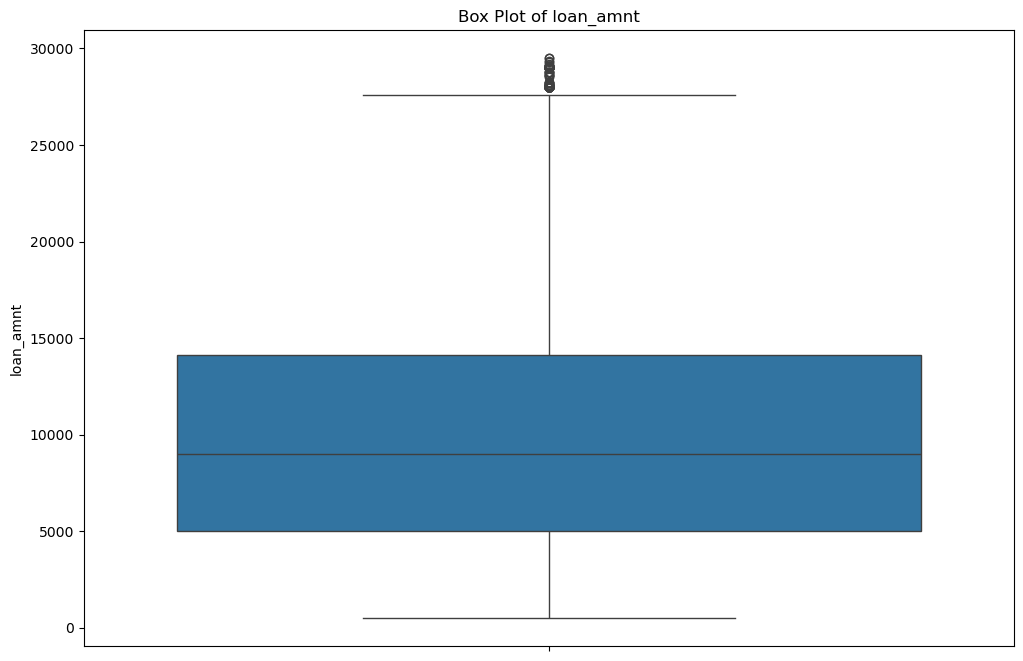

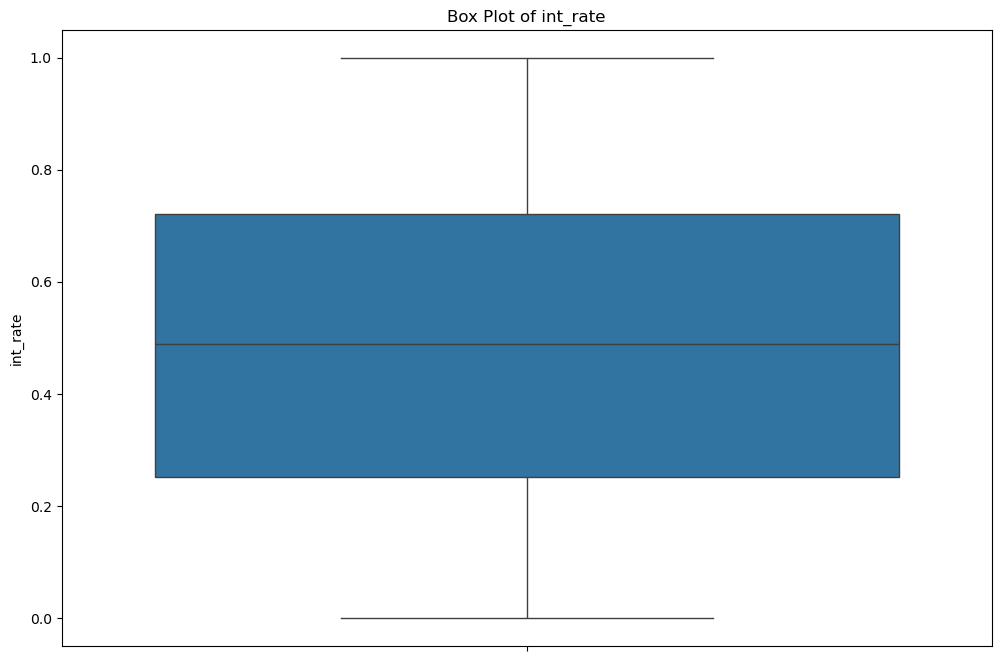

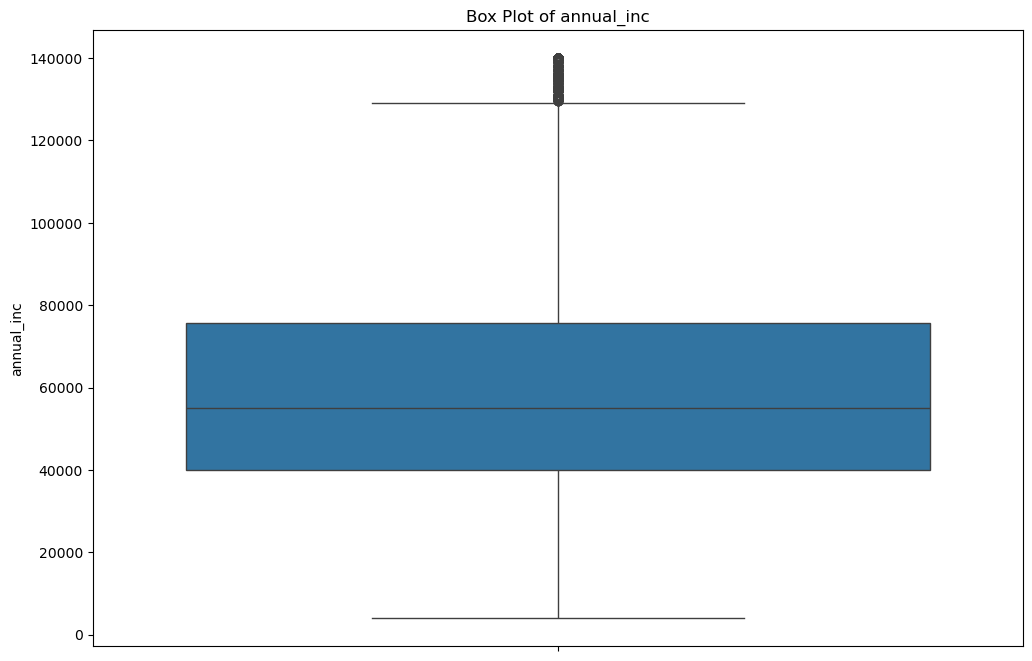

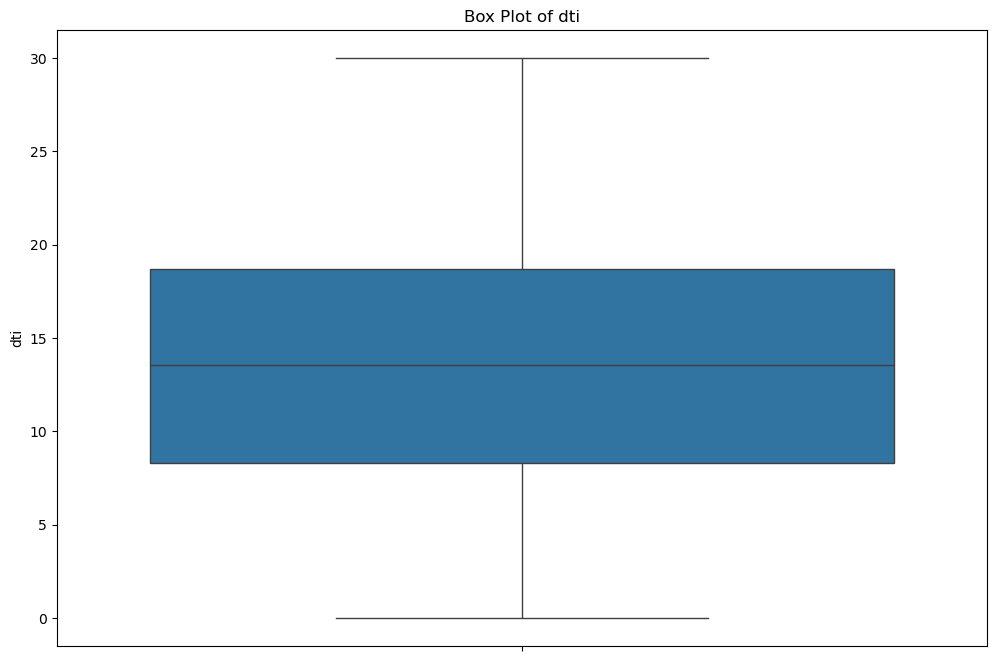

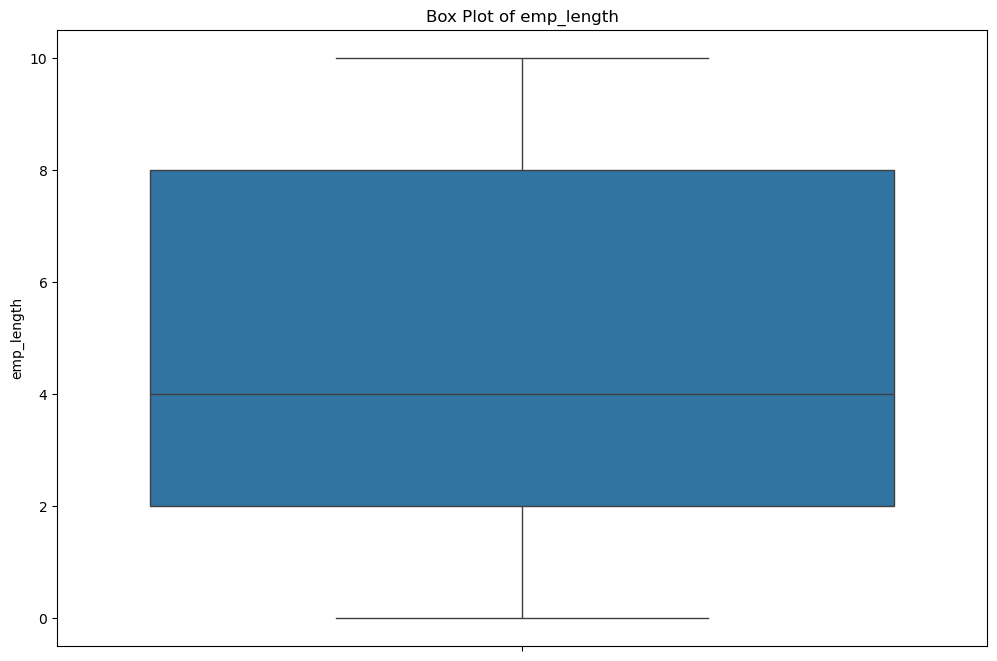

In [136]:
# Plotting box plots for key numerical variables
plot_boxplot(df_cleaned, 'loan_amnt')
plot_boxplot(df_cleaned, 'int_rate')
plot_boxplot(df_cleaned, 'annual_inc')
plot_boxplot(df_cleaned, 'dti')
plot_boxplot(df_cleaned, 'emp_length')

In [138]:
# Analyze Outliers
# Identifying outliers using IQR method

def remove_outliers(df, column):
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers from key numerical variables
df_cleaned = remove_outliers(df_cleaned, 'loan_amnt')
df_cleaned = remove_outliers(df_cleaned, 'int_rate')
df_cleaned = remove_outliers(df_cleaned, 'annual_inc')
df_cleaned = remove_outliers(df_cleaned, 'dti')
v = remove_outliers(df_cleaned, 'emp_length')

## Step 10: Imputing Missing Values

In [141]:
# Check missing values
missing_values = df_cleaned.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_values)

Columns with missing values:
desc                  11296
title                    11
last_credit_pull_d        2
tax_liens                30
dtype: int64


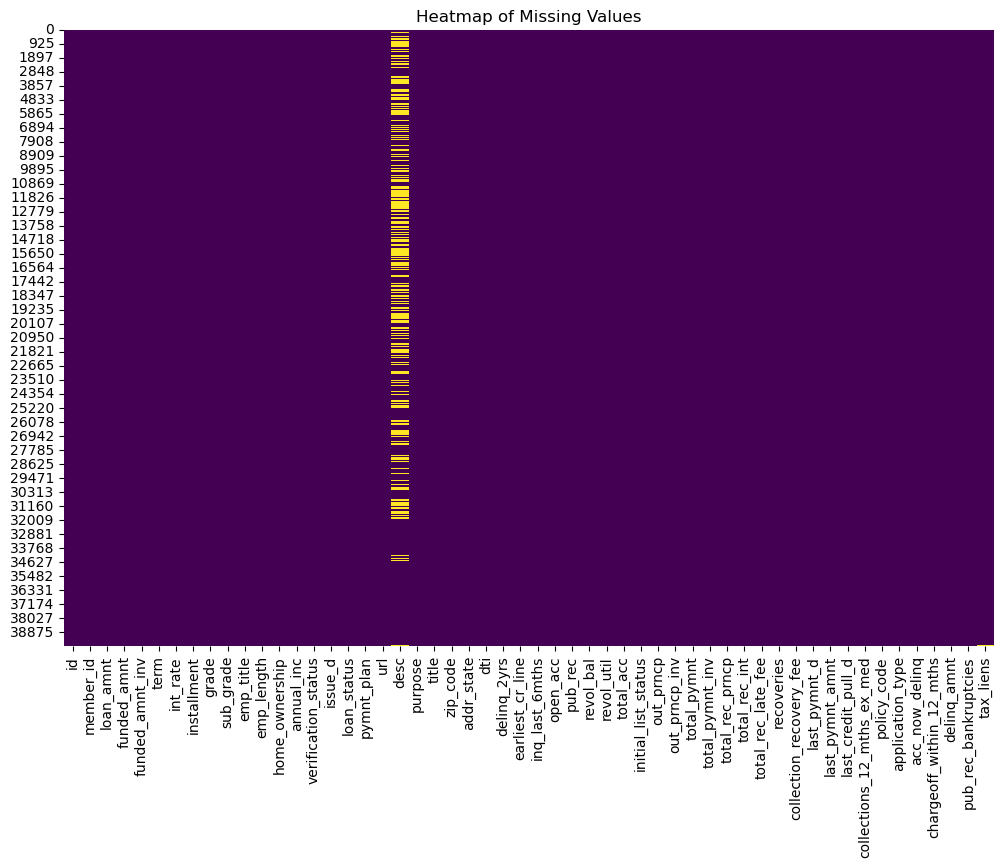

In [143]:
# Visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [145]:
# 'emp_title': Describe the column
print(df_cleaned['emp_title'].describe())

count       34965
unique      25818
top       Unknown
freq         2103
Name: emp_title, dtype: object


In [147]:
print(df_cleaned['emp_title'].value_counts())

emp_title
Unknown                2103
US Army                 119
Bank of America          97
AT&T                     52
US Air Force             50
                       ... 
los angeles county        1
NCR Corporation           1
CPEHr                     1
YESCO                     1
Evergreen Center          1
Name: count, Length: 25818, dtype: int64


In [149]:
# 'emp_title': Fill with 'Unknown'
df_cleaned['emp_title'].fillna('Unknown', inplace=True)

In [151]:
# 'emp_length': Describe the column
print(df_cleaned['emp_length'].describe())

count    34965.000000
mean         4.822651
std          3.483940
min          0.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         10.000000
Name: emp_length, dtype: float64


In [153]:
# 'emp_length: Identify the median for the variable
emp_length_median = df_cleaned['emp_length'].median()

In [155]:
# 'emp_length' : Impute missing values with the median identified in the previous line of code
df_cleaned['emp_length'].fillna(emp_length_median, inplace=True)

In [157]:
# 'pub_rec_bankruptcies': Describe the column
print(df_cleaned['pub_rec_bankruptcies'].describe())

count    34965.000000
mean         0.044473
std          0.206839
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64


In [159]:
# 'pub_rec_bankruptcies': Fill with 0
df_cleaned['pub_rec_bankruptcies'].fillna(0, inplace=True)

In [161]:
# 'last_pymnt_d': Describe the column
print(df_cleaned['last_pymnt_d'].describe())

count      34965
unique       101
top       Mar-13
freq         930
Name: last_pymnt_d, dtype: object


In [163]:
# 'last_pymnt_d': Fill forward
df_cleaned['last_pymnt_d'].fillna(method='ffill', inplace=True)

In [165]:
# 'collections_12_mths_ex_med': Describe the column
print(df_cleaned['collections_12_mths_ex_med'].describe())

count    34965.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: collections_12_mths_ex_med, dtype: float64


In [167]:
# 'collections_12_mths_ex_med': Fill with 0
df_cleaned['collections_12_mths_ex_med'].fillna(0, inplace=True)

In [169]:
# 'chargeoff_within_12_mths': Describe the column
print(df_cleaned['chargeoff_within_12_mths'].describe())

count    34965.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: chargeoff_within_12_mths, dtype: float64


In [171]:
# 'chargeoff_within_12_mths': Fill with 0
df_cleaned['chargeoff_within_12_mths'].fillna(0, inplace=True)

In [173]:
# 'revol_util': Describe the column
print(df_cleaned['revol_util'].describe())

count    34965.000000
mean         0.485419
std          0.282727
min          0.000000
25%          0.252000
50%          0.488000
75%          0.719000
max          0.999000
Name: revol_util, dtype: float64


In [175]:
# 'revol_util': Fill with median
df_cleaned['revol_util'].fillna(df_cleaned['revol_util'].median(), inplace=True)

In [177]:
# 'tax_liens': Describe the column
print(df_cleaned['tax_liens'].describe())

count    34935.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: tax_liens, dtype: float64


In [179]:
# 'tax_liens': Fill with 0
df_cleaned['tax_liens'].fillna(0, inplace=True)

In [181]:
# 'title': Describe the column
print(df_cleaned['title'].describe())

count                  34954
unique                 17850
top       Debt Consolidation
freq                    1851
Name: title, dtype: object


In [183]:
# 'title': Fill with 'Unknown'
df_cleaned['title'].fillna('Unknown', inplace=True)

In [185]:
# 'last_credit_pull_d': Describe the column
print(df_cleaned['last_credit_pull_d'].describe())

count      34963
unique       105
top       May-16
freq        8374
Name: last_credit_pull_d, dtype: object


In [187]:
# 'last_credit_pull_d': Fill forward
df_cleaned['last_credit_pull_d'].fillna(method='ffill', inplace=True)

In [189]:
# Verify if all missing values are handled
missing_values_after = df_cleaned.isnull().sum()
missing_values_after = missing_values_after[missing_values_after > 0]
print("Columns with missing values after imputation:")
print(missing_values_after)

Columns with missing values after imputation:
desc    11296
dtype: int64


# Exploratory Data Analysis

## Step 11: Univariate Analysis

### Analyze the distribution of individual variables to understand their characteristics

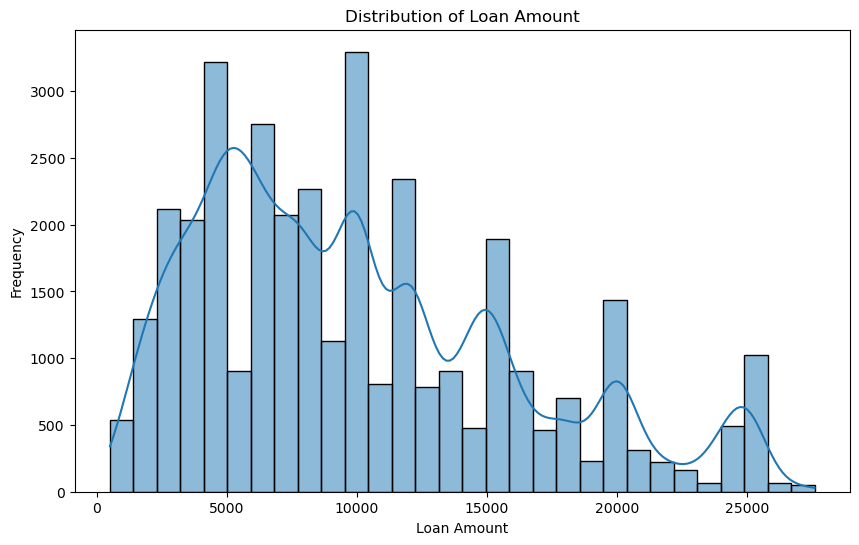

In [194]:
# Distribution of Loan Amount
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['loan_amnt'], bins=30, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

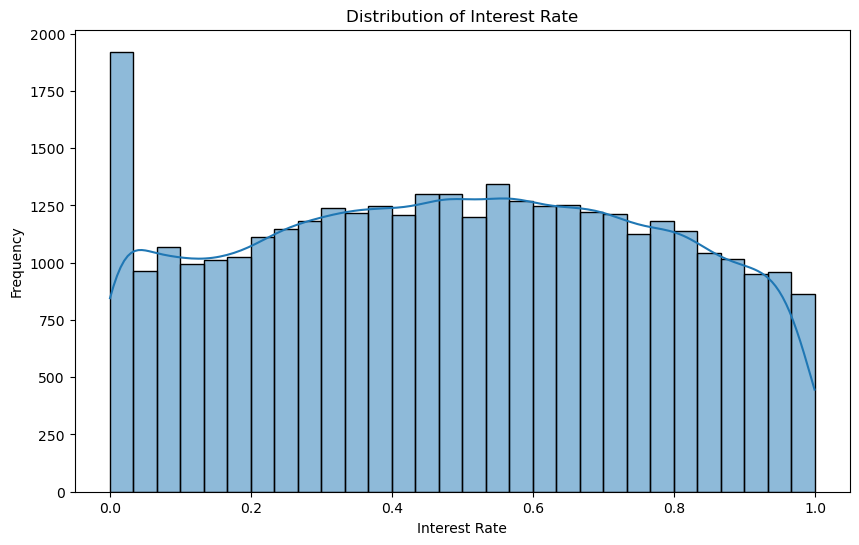

In [196]:
# Distribution of Interest Rate
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['int_rate'], bins=30, kde=True)
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

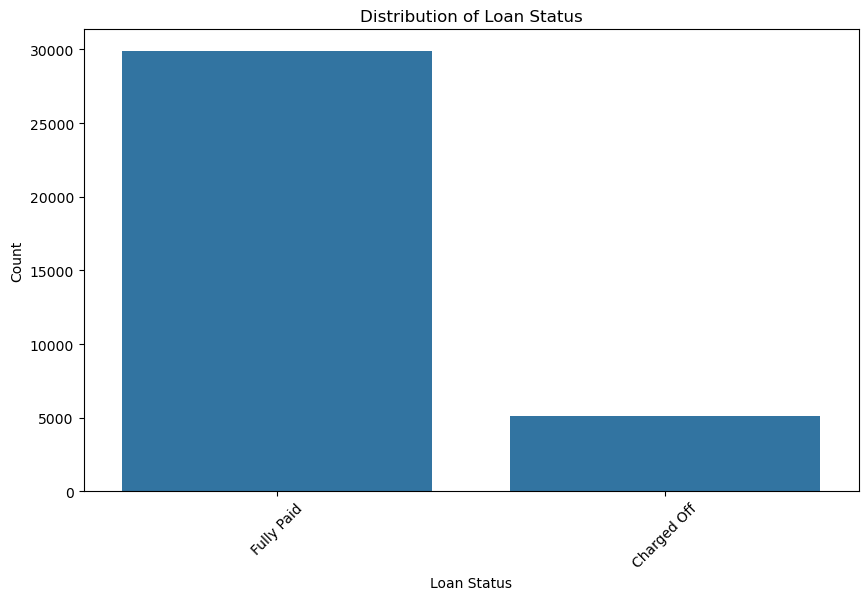

In [198]:
# Distribution of Loan Status
# This shows the counts of different loan statuses, highlighting the balance between fully paid and defaulted loans
plt.figure(figsize=(10, 6))
loan_status_counts = df_cleaned['loan_status'].value_counts()
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Step 12: Bivariate Analysis

### Examine the relationships between two variables to understand their interactions

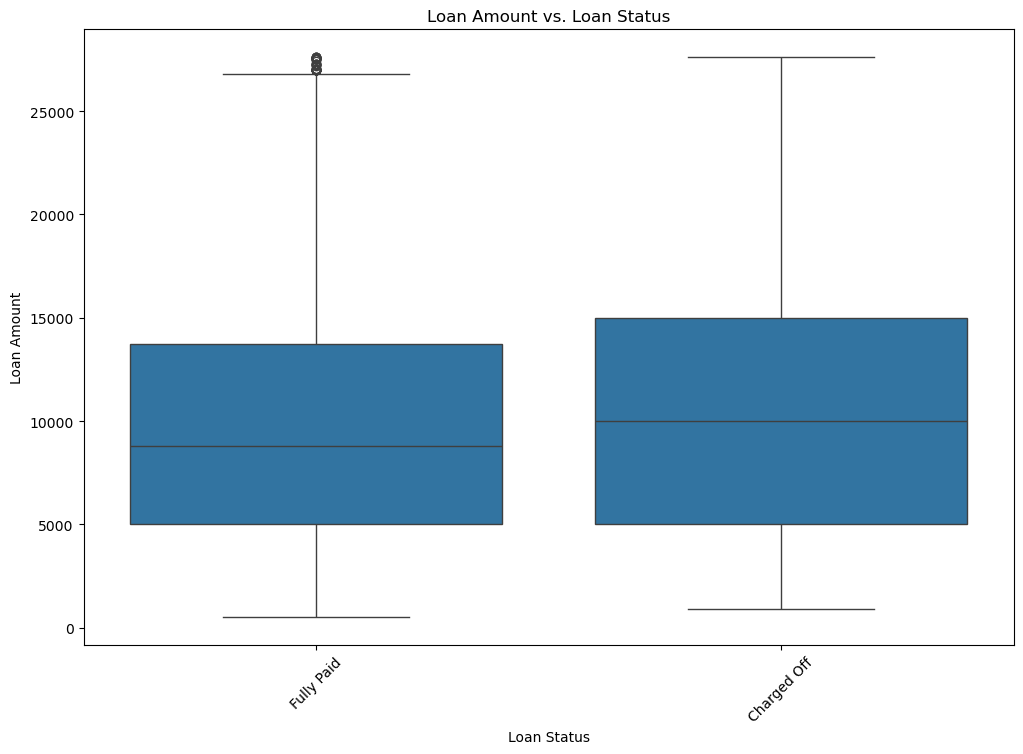

In [202]:
# Loan Amount vs. Loan Status
# Analyze how the loan amount varies across different loan statuses
plt.figure(figsize=(12, 8))
sns.boxplot(x='loan_status', y='loan_amnt', data=df_cleaned)
plt.title('Loan Amount vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

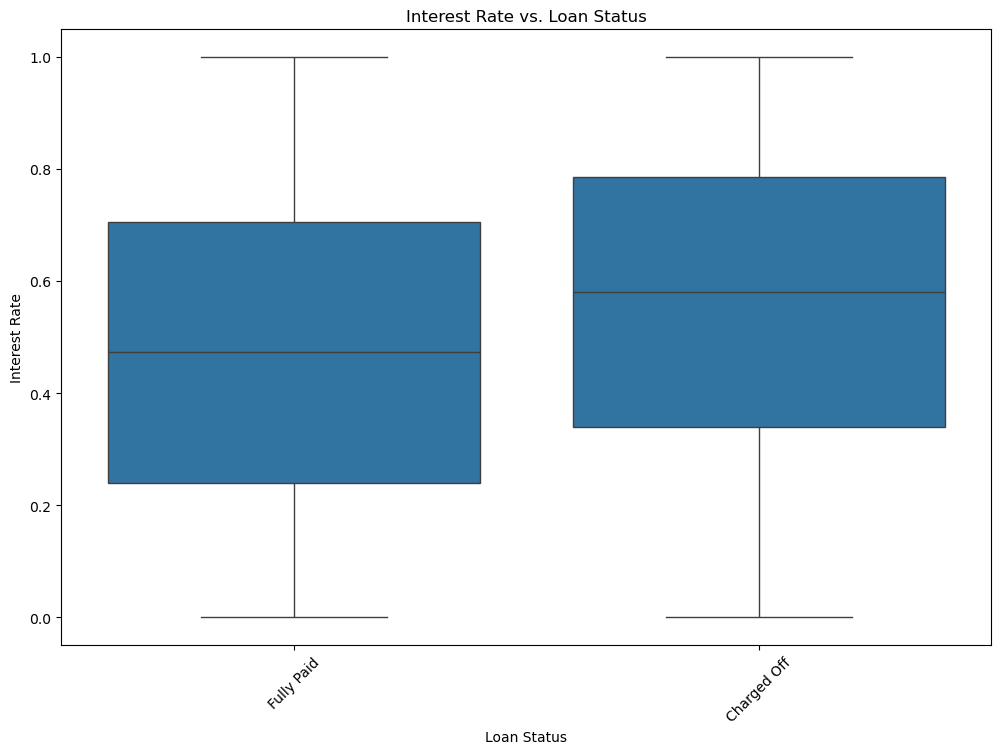

In [204]:
# Interest Rate vs. Loan Status
# Explore the relationship between interest rates and loan statuses
plt.figure(figsize=(12, 8))
sns.boxplot(x='loan_status', y='int_rate', data=df_cleaned)
plt.title('Interest Rate vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.xticks(rotation=45)
plt.show()

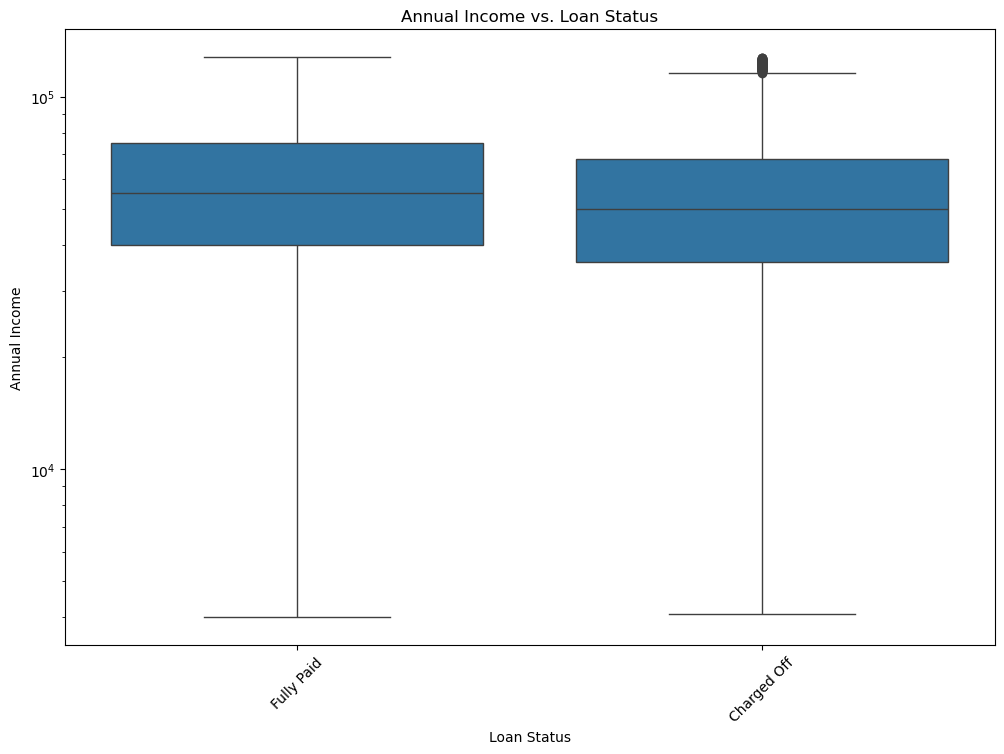

In [206]:
# Annual Income vs. Loan Status
# Examine how annual income varies with loan status, using a logarithmic scale for better visualization
plt.figure(figsize=(12, 8))
sns.boxplot(x='loan_status', y='annual_inc', data=df_cleaned)
plt.title('Annual Income vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.yscale('log')  # Use logarithmic scale for better visualization
plt.xticks(rotation=45)
plt.show()

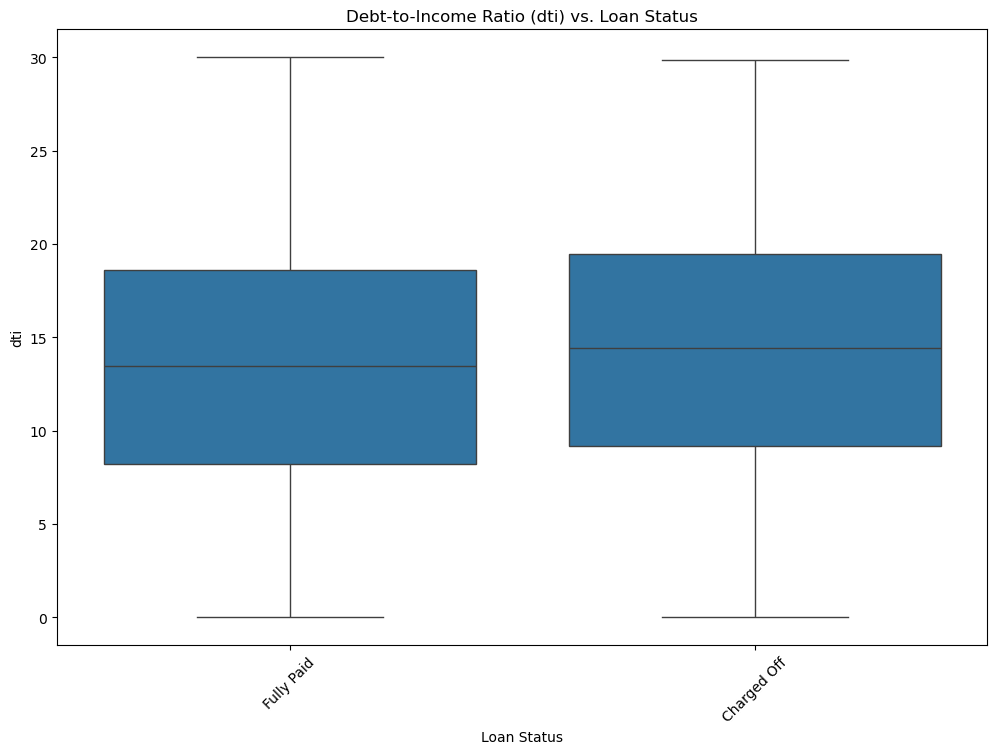

In [208]:
# Debt-to-Income Ratio (dti) vs. Loan Status
# Investigate the relationship between the debt-to-income ratio and loan status
plt.figure(figsize=(12, 8))
sns.boxplot(x='loan_status', y='dti', data=df_cleaned)
plt.title('Debt-to-Income Ratio (dti) vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('dti')
plt.xticks(rotation=45)
plt.show()

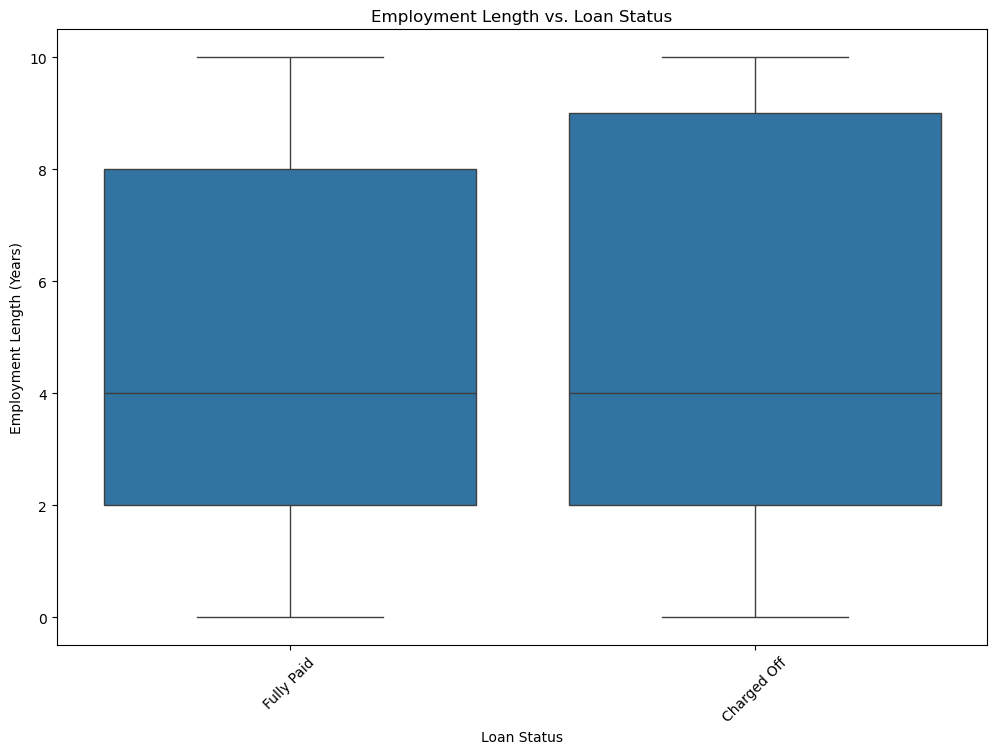

In [210]:
# Employment Length vs. Loan Status
# Assess how the length of employment impacts the likelihood of different loan statuses
plt.figure(figsize=(12, 8))
sns.boxplot(x='loan_status', y='emp_length', data=df_cleaned)
plt.title('Employment Length vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Employment Length (Years)')
plt.xticks(rotation=45)
plt.show()

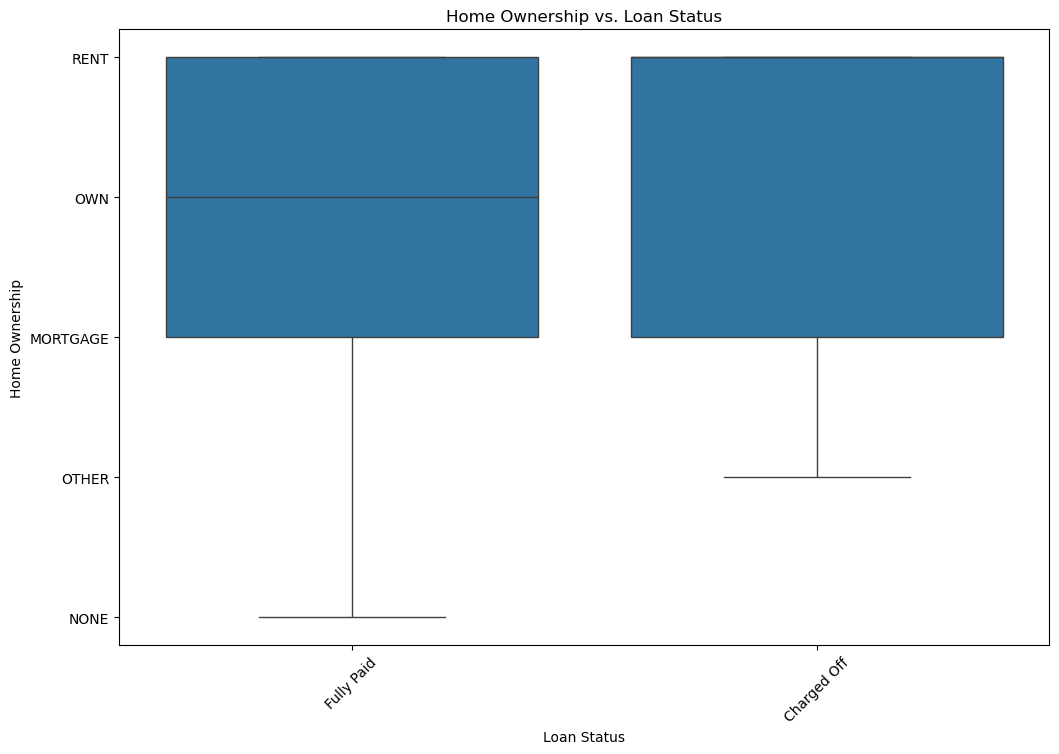

In [212]:
# Home Ownership vs. Loan Status
# Examine if home ownership status affects the loan status
plt.figure(figsize=(12, 8))
sns.boxplot(x='loan_status', y='home_ownership', data=df_cleaned)
plt.title('Home Ownership vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Home Ownership')
plt.xticks(rotation=45)
plt.show()

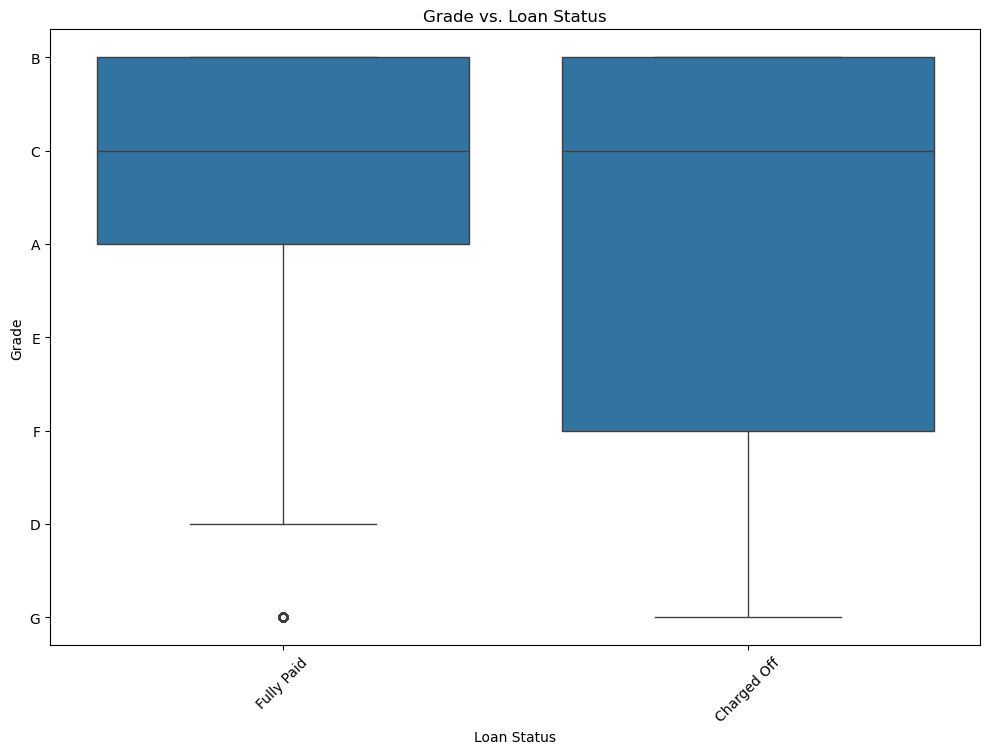

In [214]:
# Grade vs. Loan Status
# Analyze how the loan grade correlates with loan status
plt.figure(figsize=(12, 8))
sns.boxplot(x='loan_status', y='grade', data=df_cleaned)
plt.title('Grade vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Grade')
plt.xticks(rotation=45)
plt.show()

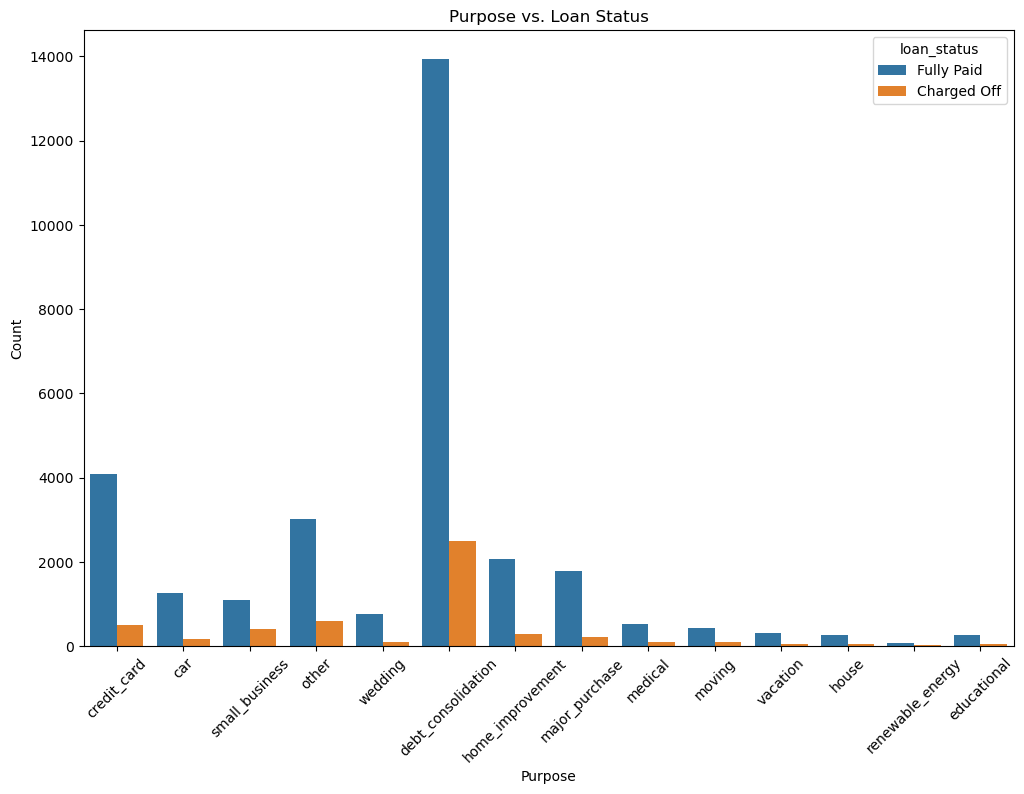

In [216]:
# Purpose vs. Loan Status
plt.figure(figsize=(12, 8))
sns.countplot(x='purpose', hue='loan_status', data=df_cleaned)
plt.title('Purpose vs. Loan Status')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

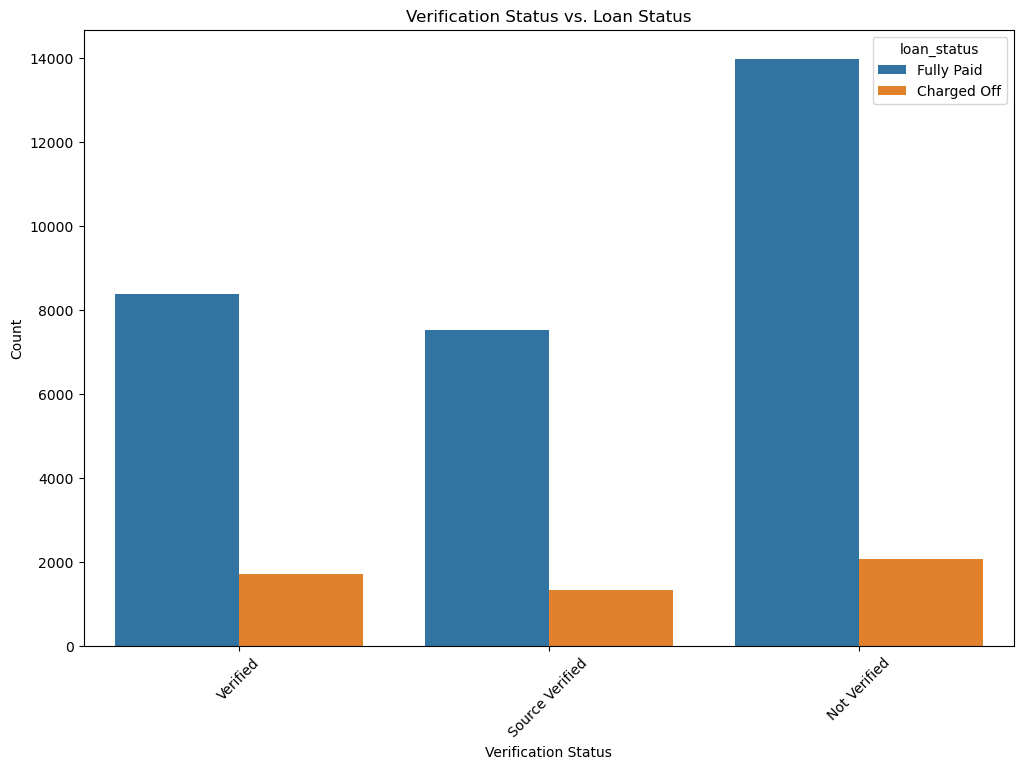

In [218]:
# Verification Status vs. Loan Status
plt.figure(figsize=(12, 8))
sns.countplot(x='verification_status', hue='loan_status', data=df_cleaned)
plt.title('Verification Status vs. Loan Status')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

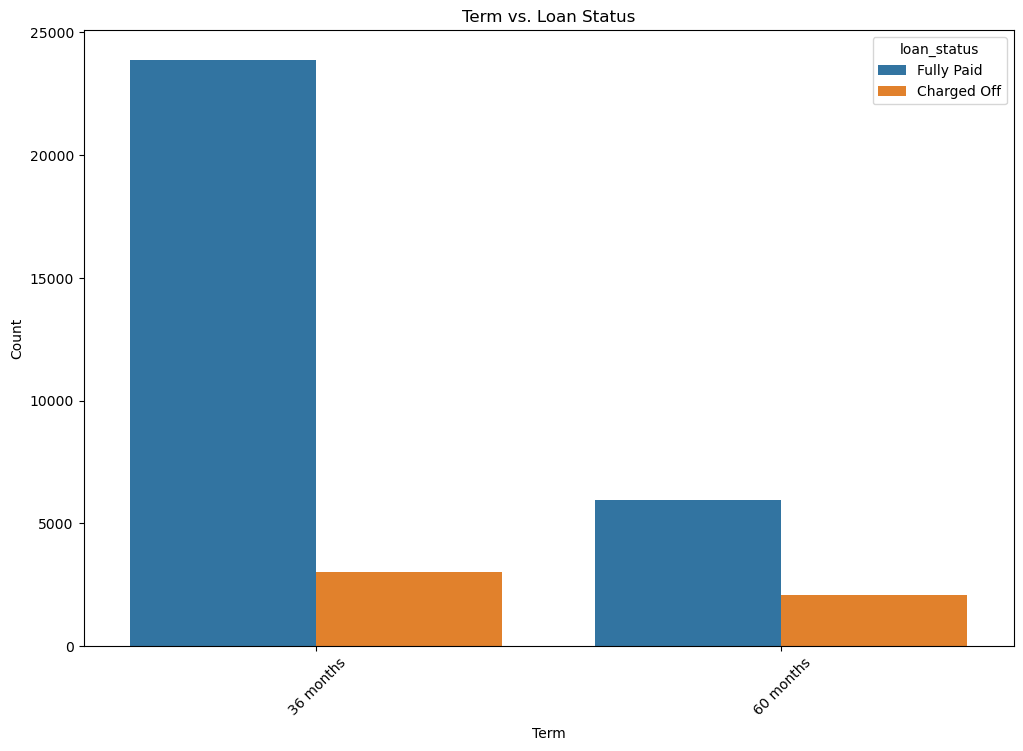

In [220]:
# Term vs. Loan Status
plt.figure(figsize=(12, 8))
sns.countplot(x='term', hue='loan_status', data=df_cleaned)
plt.title('Term vs. Loan Status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Step 13: Multivariate Analysis

In [223]:
## Correlation represents strength of relationship between variables
## Correleation lies in the range of -1 to 1
## Negative Correlation (0 to -1) shows inverse relationship
## Position Correlation (0 to 1) shows direct relationship
## 0 or near by correlation represents no relationship

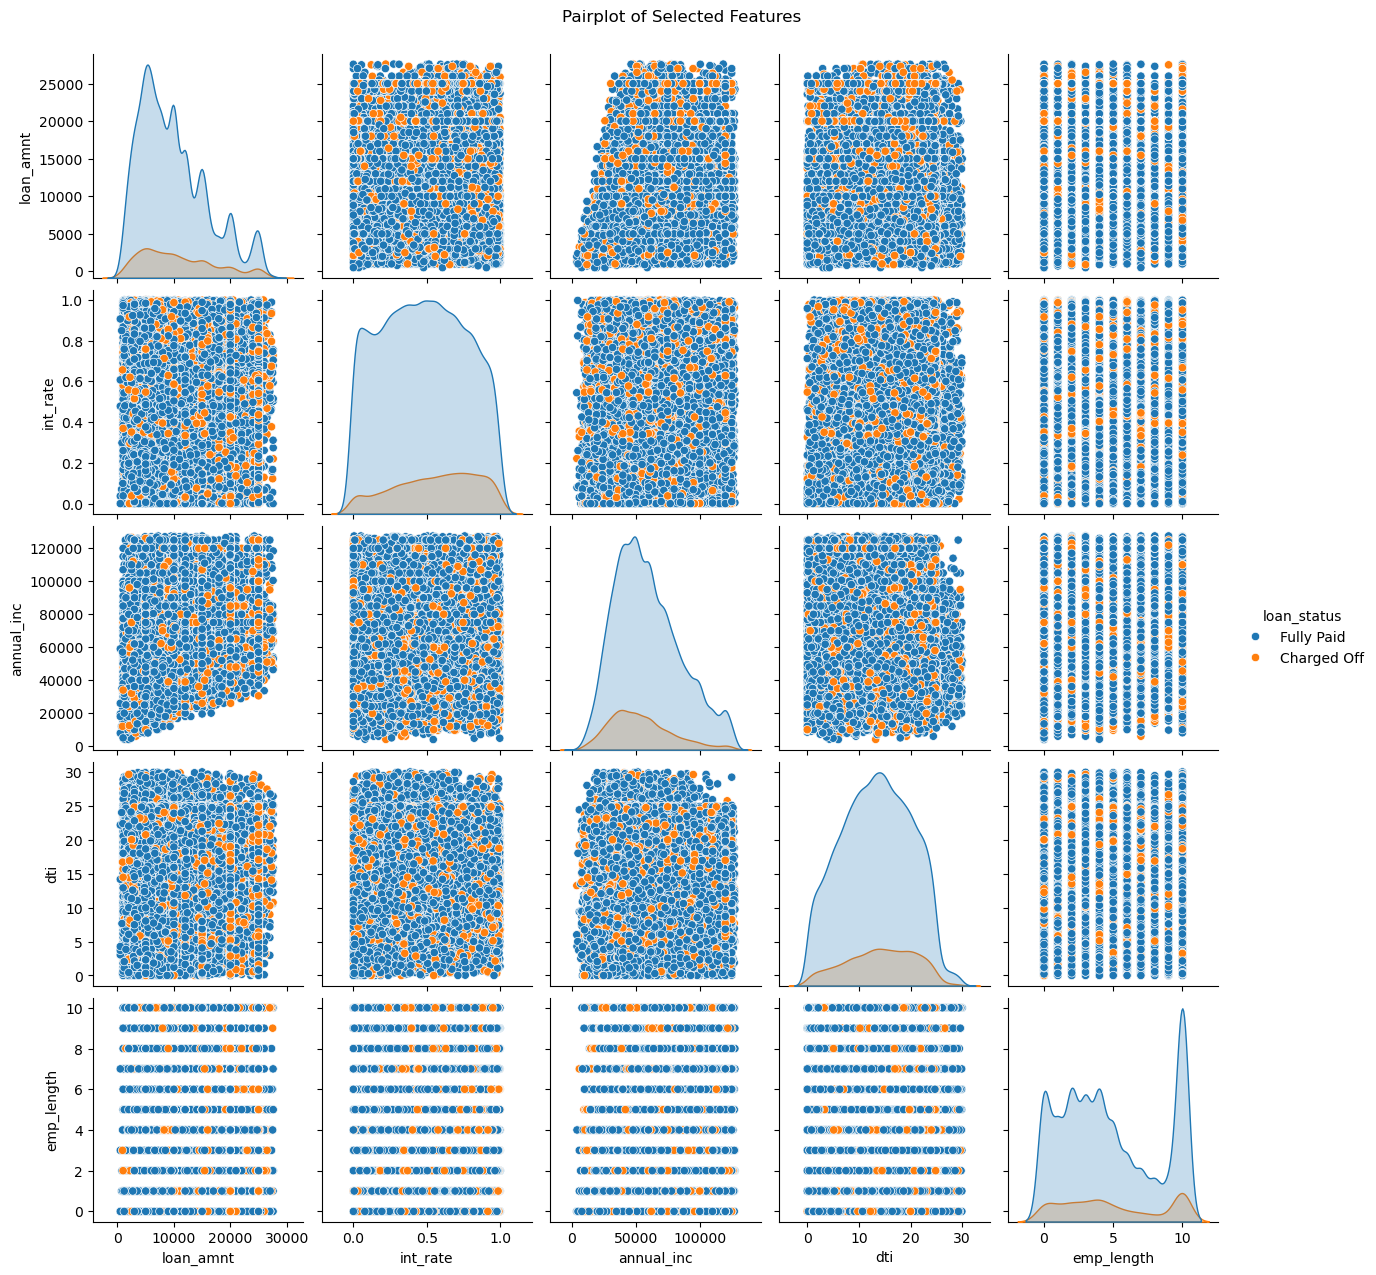

In [226]:
# Pairplot of selected features
selected_features = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'emp_length']
sns.pairplot(df_cleaned, hue='loan_status', vars=selected_features)
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

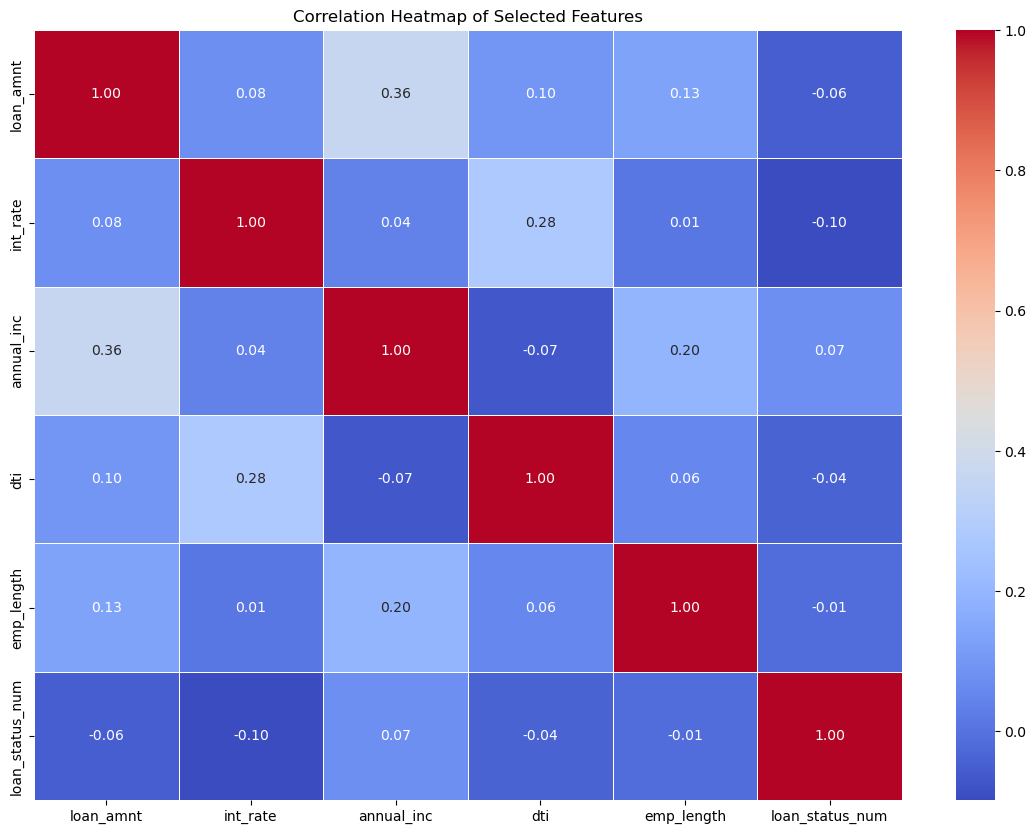

In [231]:
# Define a mapping for loan_status
loan_status_mapping = {
    'Fully Paid': 1,
    'Charged Off': 0,
    'Current': 2  # Assuming 'Current' means still paying, you might exclude it if needed
}

# Apply the mapping to create a numerical loan_status column
df_cleaned['loan_status_num'] = df_cleaned['loan_status'].map(loan_status_mapping)

# Selected features for correlation analysis
selected_features = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'emp_length', 'loan_status_num']

# Calculate the correlation matrix
corr_matrix = df_cleaned[selected_features].corr()

# Plot the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()